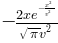

In [161]:
%matplotlib inline
from sympy import * 
from IPython.display import display
init_printing()

t, x, u, s, v = symbols('t, x, mu, sigma, v')
p = exp(-(x-u)**2/(2*s*s))/sqrt(2*pi)/s
P = exp(-(x-u)**2/(2*s*s))
f = 0.5 + 0.5 * erf( ( x - u ) / sqrt( 2 ) / s )
e0 = t - f
e1 = (  t)*log(  f)
e2 = (1-t)*log(1-f)
J = [diff(e0, u), diff(e0, s)]
H = [[diff(J[0], u), diff(J[0], s)], [diff(J[1], u), diff(J[1], s)]]
D = H[0][0] * H[1][1] - H[1][0] * H[1][0]

#display(diff(f, x))
#display(simplify(diff(e1, s)/p*(f)))
display(simplify((diff(erf(x/v), v))))

40.1

40.316217516166148

4.4

4.0926744506535435

(-60, 0)

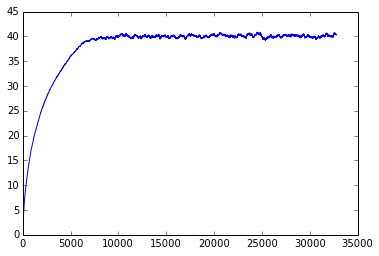

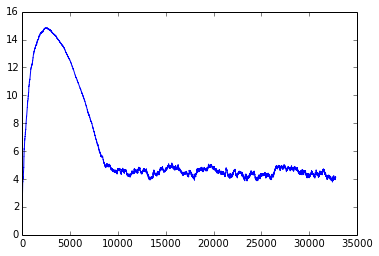

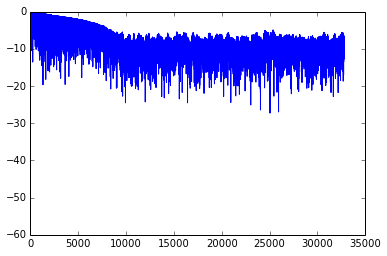

In [62]:
#交差エントロピー最小化　２値
%matplotlib inline
from matplotlib.pylab import *
from IPython.display import display

mu = 40.1
ms = 4.4
eu = 1.0
es = 1.8
eps = 0.1

c = 0
e = []
s = []
u = []

def F(x, u, s):
    from math import erf
    return 0.5 + 0.5 * erf((x-u)/s/sqrt(2))
    
def P(x, u, s):
    from math import exp
    return exp(-((x-u)/s)**2/2)/sqrt(pi)/s

def L(d, x, u, s):
    from math import log
    return (d)*log(F(x,u,s))+(1-d)*log(1-F(x,u,s))

def dJ(d, x, u, s, eps):
    return array([
        -0.5*(L(d, x, u+eps, s)-L(d, x, u-eps, s))/eps,
        -0.5*(L(d, x, u, s+eps)-L(d, x, u, s-eps))/eps
    ], dtype='float64')

def J(d, x, u, s):
    p = P(x, u, s)
    f = F(x, u, s)
    df = (d)*(p)/(f)-(1-d)*(p)/(1-f)
    return array([
        df,
        df*(u-x)/s,
    ], dtype='float64')

def dH(d, x, u, s, eps):
    return -array([
        0.5*(J(d, x, u+eps, s)-J(d, x, u-eps, s))/eps,
        0.5*(J(d, x, u, s+eps)-J(d, x, u, s-eps))/eps
    ], dtype='float64')

def ddH(d, x, u, s, eps):
    return array([
        0.5*(dJ(d, x, u+eps, s, eps)-dJ(d, x, u-eps, s, eps))/eps,
        0.5*(dJ(d, x, u, s+eps, eps)-dJ(d, x, u, s-eps, eps))/eps
    ])

var = 0
for k in range(2**15):
    x = normal()*es+eu
    n = normal()*es+eu
    d = normal()*ms+mu
    
    er = F(x, mu, ms) - F(x, eu, es)
    e.append(er)
    u.append(eu)
    s.append(es)
    
    j = J(d<x, x, eu, es)
    eu = eu - eps * j[0]
    es = abs(es + eps * j[1])
#    j = P(x,eu,es) * ((d<x)-F(x,eu,es))*(x-eu)/es
#    es = abs(es - eps * j)

display(mu, eu)
display(ms, es)
figure();plot(u)
figure();plot(s)
figure();plot(log(array(e, dtype='float64')**2))
ylim(-60,0)


/Users/Kota/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:38: RuntimeWarning: divide by zero encountered in double_scalars


0

1.5

nan

1.8

nan

(-60, 0)

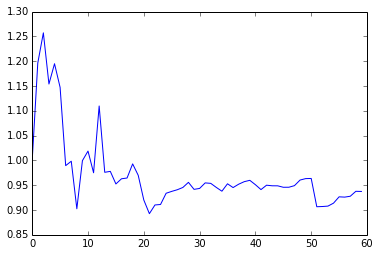

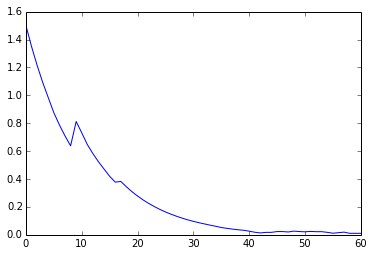

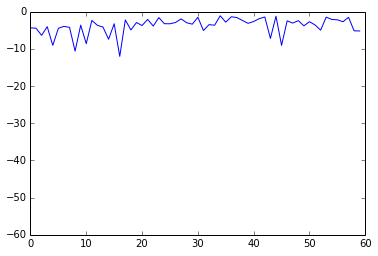

In [15]:
#交差エントロピー最小化 数値差分
%matplotlib inline
from matplotlib.pylab import *
from IPython.display import display

mu = 1.5
ms = 1.8
eu = 1.0
es = 1.5
eps = 0.1

c = 0
e = []
u = []
s = []

def F(x, u, s):
    from math import erf
    return 0.5 + 0.5 * erf((x-u)/sqrt(2)/s)
    
def P(x, u, s):
    from math import exp
    return exp(-((x-u)/s)**2)/sqrt(2*pi)/s    

def L(d, x, u, s):
    from math import log
    return (d)*log(F(x,u,s))+(1-d)*log(1-F(x,u,s))

def dJ(d, x, u, s, eps):
    return array([
        -0.5*(L(d, x, u+eps, s)-L(d, x, u-eps, s))/eps,
        -0.5*(L(d, x, u, s+eps)-L(d, x, u, s-eps))/eps
    ],dtype='float64')

def J(d, x, u, s):
    p = P(x, u, s)
    f = F(x, u, s)
    df = (d)*(p)/(f)-(1-d)*(p)/(1-f)
    return array([
        df,
        df*(x-u)/s,
    ], dtype='float64')

def dH(d, x, u, s, eps):
    return -array([
        0.5*(J(d, x, u+eps, s)-J(d, x, u-eps, s))/eps,
        0.5*(J(d, x, u, s+eps)-J(d, x, u, s-eps))/eps
    ], dtype='float64')

def ddH(d, x, u, s, eps):
    return array([
        0.5*(dJ(d, x, u+eps, s, eps)-dJ(d, x, u-eps, s, eps))/eps,
        0.5*(dJ(d, x, u, s+eps, eps)-dJ(d, x, u, s-eps, eps))/eps
    ])

for k in range(2**12):
    x = normal()*es+eu
    
    mf = F(x, mu, ms)
    mp = P(x, mu, ms)
    
    ef = F(x, eu, es)
    ep = P(x, eu, es)
    
    er = mf - ef
    e.append(er)
    u.append(eu)
    s.append(es)
    
    j = J(mf, x, eu, es)
    h = dH(mf, x, eu, es, 0.01)
#    display(k, eu, es, j, h, inv(h))
    
    j = j.dot(inv(h))
#    display(j)
#    try:
#        val, vec = eig(h)
#        j = inv(vec.dot(diag(abs(val))).dot(inv(vec))).dot(j)
#        
#    except:
#        c = c + 1
    
    eu =    (eu - eps * j[0])
    es = abs(es - eps * j[1])

display(c)
display(mu, eu)
display(ms, es)
figure();plot(u)
figure();plot(s)
figure();plot(log(array(e, dtype='float64')**2))
ylim(-60,0)



/Users/Kota/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log


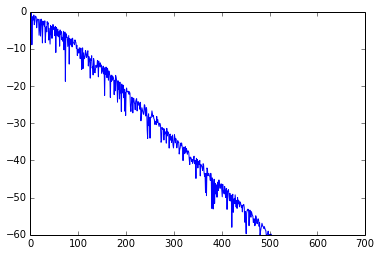

In [171]:
#交差エントロピー最小化
%matplotlib inline
from matplotlib.pylab import *
from math import exp
from scipy.special import erf
from IPython.display import display
mu = -1.5
ms = 1.5
eu = 3.3
es = 1.5
eps = 0.5
e = []
for k in range(2048):
    x = normal()*es+eu
    
    mf = 0.5+0.5*erf((x-mu)/sqrt(2)/ms)
    mp = exp(-(x-mu)**2/(2*ms*ms))/sqrt(2*pi)/ms
    
    ef = 0.5+0.5*erf((x-eu)/sqrt(2)/es)
    ep = exp(-(x-eu)**2/(2*es*es))/sqrt(2*pi)/es
    
    er = mf - ef
    e.append(er)
    
    u = eu
    s = es
    f = ef
    p = ep
    t = mf
    
    df = (t) * p / f + (t-1) * p / (1-f)
    
    ds = -df * (x-u)/s
    es = es + eps * ds
    
    du = -df
    eu = eu + eps * du

display(mu, eu)
display(ms, es)
plot(log(array(e, dtype='float32')**2))
ylim(-60,0)

0

-1.5

array([-1.5])

1.5

array([ 1.5])

/Users/Kota/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:52: RuntimeWarning: divide by zero encountered in log


(-60, 0)

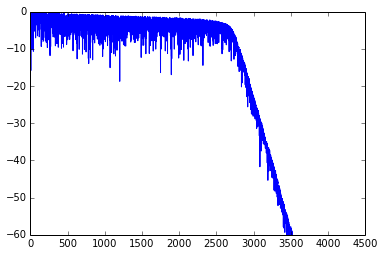

In [32]:
#交差エントロピー - ニュートン法最小化
%matplotlib inline
from matplotlib.pylab import *
from math import exp, sqrt
from scipy.special import erf
from IPython.display import display
mu = -1.5
ms = 1.5
eu = 20.0
es = 10.5
eps = 0.3
c = 0
e = []
for k in range(2**12):
    x = normal()*es+eu
    
    mf = 0.5+0.5*erf((x-mu)/sqrt(2)/ms)
    mp = exp(-(x-mu)**2/(2*ms*ms))/sqrt(2*pi)/ms
    
    ef = 0.5+0.5*erf((x-eu)/sqrt(2)/es)
    ep = exp(-(x-eu)**2/(2*es*es))/sqrt(2*pi)/es
    
    er = mf - ef
    e.append(er)
    
    u = eu
    s = es
    f = ef
    p = ep
    t = mf
    
    J = zeros((2,1), dtype='float64')
              
    J[0] = p*((  t)/(  f)-(1-t)/(1-f))
    J[1] = p*((  t)/(  f)-(1-t)/(1-f))*(x-u)/s
    
    H = zeros((2,2), dtype='float64')
    H[0,0] = (  t)/(  f)*(p*(u-x)/s/s - J[0]*J[0]/(  f))\
           - (1-t)/(1-f)*(p*(u-x)/s/s - J[0]*J[0]/(1-f))
        
    H[0,1] = (  t)/(  f)*(p*(1-((u-x)/s)**2)/s - J[0]*J[1]/(  f))\
           - (1-t)/(1-f)*(p*(1-((u-x)/s)**2)/s - J[0]*J[1]/(1-f))
    
    H[1,0] = (  t)/(  f)*(p*(1-((u-x)/s)**2)/s - J[1]*J[0]/(  f))\
           - (1-t)/(1-f)*(p*(1-((u-x)/s)**2)/s - J[1]*J[0]/(1-f))
    
    H[1,1] = (  t)/(  f)*(p*(u-x)*(((u-x)/s)**2-1)/s/s - J[1]*J[1]/(  f))\
           - (1-t)/(1-f)*(p*(u-x)*(((u-x)/s)**2-1)/s/s - J[1]*J[1]/(1-f))
    
    eu = eu - eps * J[0]
    es = es - eps * J[1]

display(c)
display(mu, eu)
display(ms, es)
plot(log(array(e, dtype='float64')**2))
ylim(-60,0)

-1.5

-1.4999999999999993

1.5

1.5000000000000111

/Users/Kota/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:42: RuntimeWarning: divide by zero encountered in log


(-60, 0)

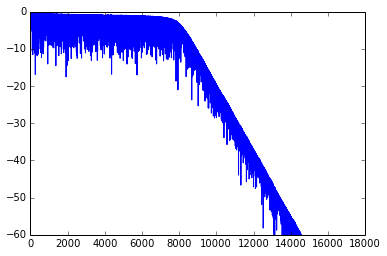

In [20]:
#RMS最小化
%matplotlib inline
from matplotlib.pylab import *
from math import exp
from scipy.special import erf
from IPython.display import display
mu = -1.5
ms = 1.5
eu = 20.0
es = 10.5
eps = 0.5
e = []

def F(x, u, s):
    from math import erf
    return 0.5 + 0.5 * erf((x-u)/sqrt(2)/s)
    
def P(x, u, s):
    from math import exp
    return exp(-((x-u)/s)**2)/sqrt(2*pi)/s    

for k in range(16384):
    x = normal()*es+eu
    
    mf = F(x, mu, ms)
    mp = P(x, mu, ms)
    
    ef = F(x, eu, es)
    ep = P(x, eu, es)
    
    er = mf - ef
    e.append(er)
    
    ds = ep * ( eu - x ) / ms
    es = es + er * eps * ds
    
    du = -ep
    eu = eu + er * eps * du

display(mu, eu)
display(ms, es)
plot(log(array(e, dtype='float32')**2))
ylim(-60,0) 

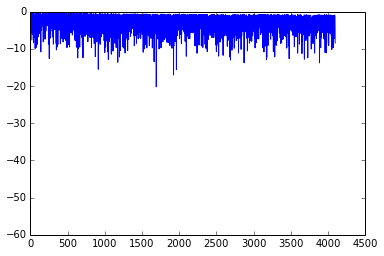

In [687]:
#RMS最小化
%matplotlib inline
from matplotlib.pylab import *
from math import exp
from scipy.special import erf
from IPython.display import display
mu = -1.5
ms = 1.5

eu = 20.0
es = 10.5
eps = 0.5
e = []
for k in range(4096):
    x = normal()*es+eu
    
    mf = 0.5*(1+erf((x-mu)/sqrt(2)/ms))
    mp = exp(-(x-mu)**2/(2*ms*ms))/sqrt(2*pi)/ms
    
    ef = 0.5*(1+erf((x-eu)/sqrt(2)/es))
    ep = exp(-(x-eu)**2/(2*es*es))/sqrt(2*pi)/es
    
    er = mf - ef
    e.append(er)
    
    ds = ep * ( eu - x ) / ms
    es = es + er * eps * ds
    
    du = -ep
    eu = eu + er * eps * du

display(mu, eu)
display(ms, es)
plot(log(array(e, dtype='float32')**2))
ylim(-60,0) 

In [132]:
from IPython.display import display
from matplotlib.pylab import *
X = array([[1,1],[1,-1]])
s = array([-5, 1])
A = X.dot(diag(s)).dot(inv(X))
display(inv(X), eig(A))

array([[ 0.5,  0.5],
       [ 0.5, -0.5]])

(array([ 1., -5.]), array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

In [41]:
from math import erf
eps = pow(2, -20)
f = 0
s = 3.0
for k in range(2**20):
    f = f + exp(-(k*eps/s)**2)

display(f*eps/sqrt(pi)/s, erf(1/s)/2.0)

0.18132406531336964

0.18132405588303144